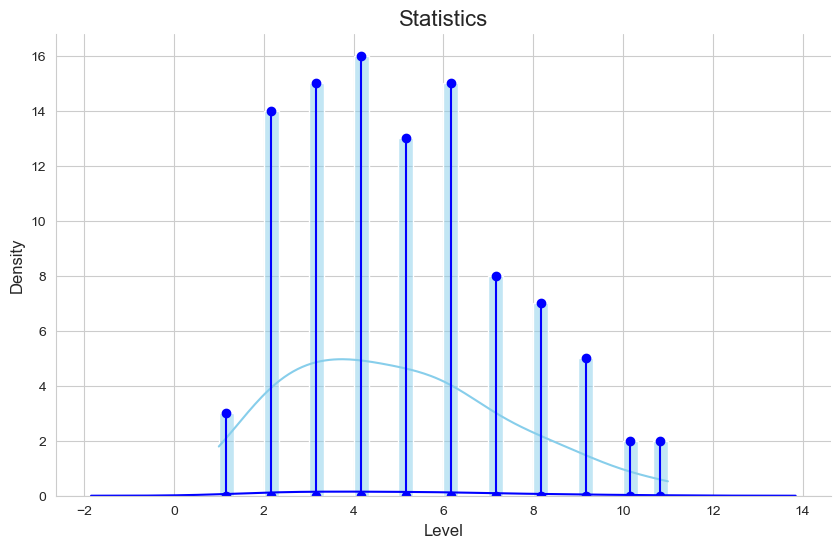

In [21]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data again to ensure it's up-to-date
# Need to change the path
data = pd.read_csv("/Users/owensun/Downloads/fake_game_data.csv")

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Level'], bins=30, kde=True, color='skyblue')

# Overlaying the KDE plot
sns.kdeplot(data['Level'], color='blue', ax=ax)

# Enhancing the plot with markers for each bin
for p in ax.patches:
    if p.get_height() > 0:
        plt.plot((p.get_x() + p.get_width() / 2, p.get_x() + p.get_width() / 2), (0, p.get_height()), color='blue', marker='o')

# Set title and labels
ax.set_title('Statistics', fontsize=16)
ax.set_xlabel('Level', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


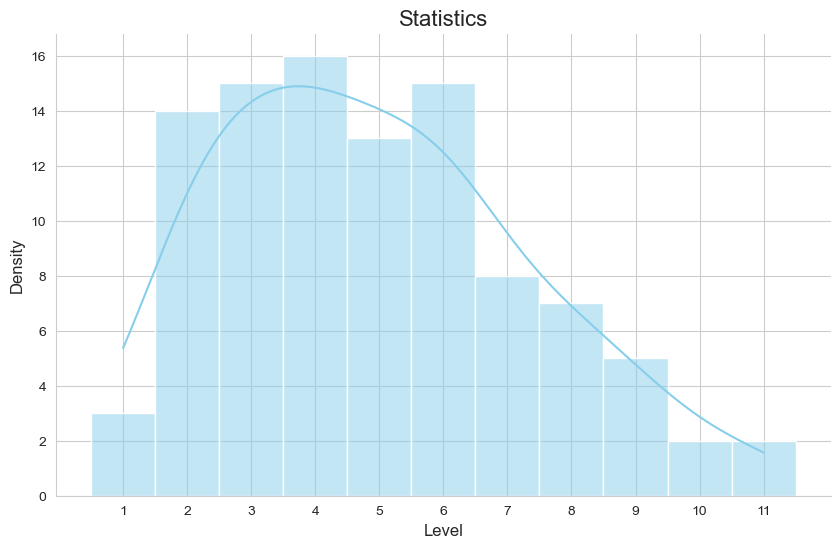

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data has already been loaded and is in a pandas DataFrame
# Let's define bins based on the minimum and maximum levels in the data
level_min = data['Level'].min()
level_max = data['Level'].max()
bins = range(level_min, level_max + 2)  # +2 to include the right edge for the last bin

# Create the histogram plot with KDE
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Level'], bins=bins, kde=True, color='skyblue', discrete=True)



# Overlaying the KDE plot
# Using bw_adjust to smooth the kde curve
#sns.kdeplot(data['Level'], color='blue', ax=ax, bw_adjust=0.3)

# Set the ticks for x-axis to be at the integers
ax.set_xticks(range(level_min, level_max + 1))  # +1 to include the last level

# Enhancing the plot with markers for each bin
bin_centers = [x + 0.5 for x in range(level_min, level_max + 1)]
bin_heights, _ = np.histogram(data['Level'], bins=bins, range=(level_min, level_max + 1))
#for x, y in zip(bin_centers, bin_heights):
    #if y > 0:
        #ax.plot(x, y, color='blue', marker='o')

# Set title and labels
ax.set_title('Game Statistics', fontsize=16)
ax.set_xlabel('Level', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


In [4]:
import csv
import random

def generate_game_data(num_sessions, target_avg_max_level):
    game_sessions = []
    for _ in range(num_sessions):
        session = []
        incorrect_attempts = 0
        level = 1
        max_level_reached = target_avg_max_level + random.randint(-2, 3)  # Adjust max level variability

        # Ensure there are at least enough levels to have 3 incorrect attempts and still reach the target average max level
        while level < max_level_reached or incorrect_attempts < 3:
            if level == max_level_reached and incorrect_attempts < 2:  # Ensure the last two levels are incorrect if needed
                result = "incorrect"
                incorrect_attempts += 1
            elif level >= max_level_reached:  # Last attempt must be incorrect
                result = "incorrect"
                incorrect_attempts += 1
            else:
                result = "correct" if random.random() < 0.75 or incorrect_attempts >= 3 else "incorrect"
                if result == "incorrect":
                    incorrect_attempts += 1
            time_spent = round(random.uniform(5, 20), 2)  # Time spent on each level attempt
            session.append([level, result, time_spent])
            if result == "correct":
                level += 1

        game_sessions.append(session)
    return game_sessions

def save_to_csv(filename, game_sessions):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for session in game_sessions:
            flattened_session = [item for sublist in session for item in sublist]
            writer.writerow(flattened_session)

# Generate 100 game sessions aiming for an average highest level of 7
game_sessions = generate_game_data(100, 7)

# Save the generated game data to CSV
save_to_csv('/Users/owensun/game_data.csv', game_sessions)



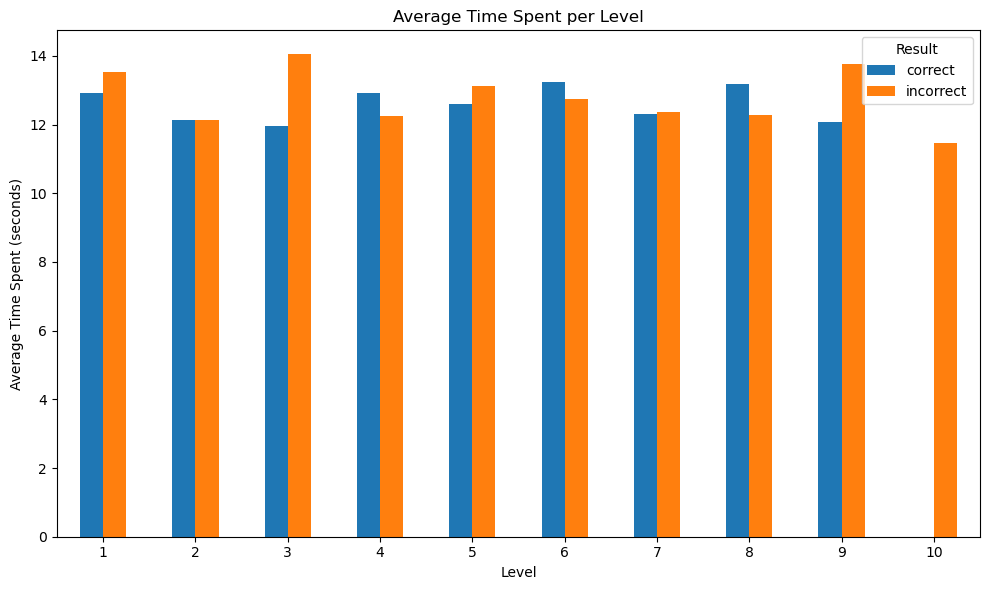

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and process the game data
file_path = '/Users/owensun/game_data.csv'  # Update this path to your CSV file location

with open(file_path, 'r') as file:
    lines = file.readlines()

parsed_data = []
for line in lines:
    elements = line.strip().split(',')
    for i in range(0, len(elements), 3):
        level = int(elements[i])
        result = elements[i+1]
        time_spent = float(elements[i+2])
        parsed_data.append([level, result, time_spent])

df = pd.DataFrame(parsed_data, columns=['Level', 'Result', 'Time Spent'])

# Visualization 1: Average Time Spent per Level for Correct vs Incorrect Attempts
avg_time_spent = df.groupby(['Level', 'Result'])['Time Spent'].mean().unstack()
avg_time_spent.plot(kind='bar', figsize=(10, 6))
plt.title('Average Time Spent per Level')
plt.ylabel('Average Time Spent (seconds)')
plt.xlabel('Level')
plt.xticks(rotation=0)
plt.legend(title='Result')
plt.tight_layout()



plt.show()



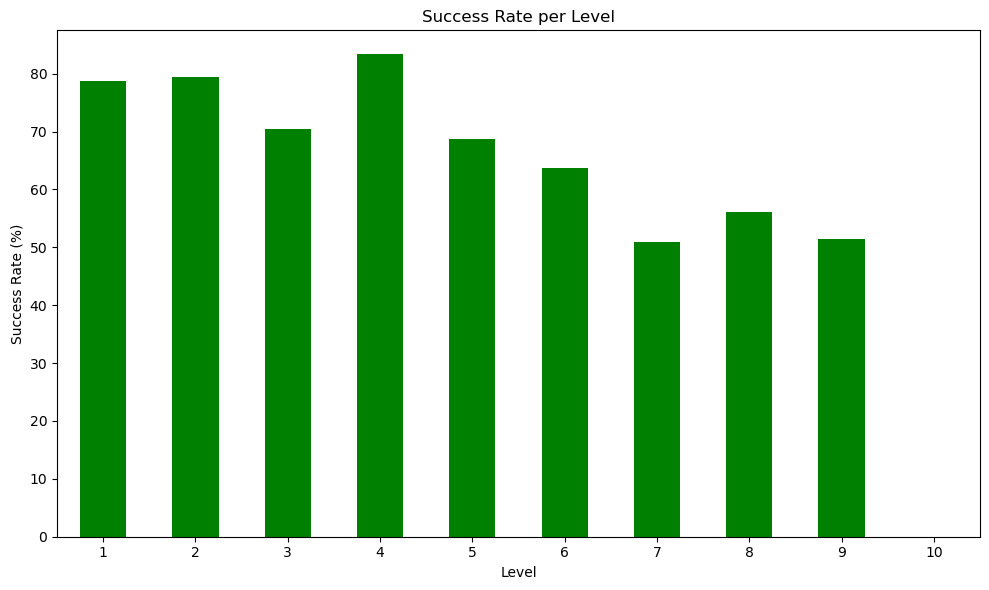

In [7]:
# Visualization 2: Success Rate per Level
success_rate = df.pivot_table(index='Level', columns='Result', aggfunc='size', fill_value=0)
success_rate['Success Rate'] = success_rate['correct'] / (success_rate['correct'] + success_rate['incorrect']) * 100
success_rate['Success Rate'].plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Success Rate per Level')
plt.ylabel('Success Rate (%)')
plt.xlabel('Level')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()